# Slow Matrix product


In [1]:
import numpy as np


def slow_matrix_product(mat1, mat2):
    """Multiply two matrices."""
    assert mat1.shape[1] == mat2.shape[0]
    result = []
    for c in range(mat2.shape[1]):
        column = []
        for r in range(mat1.shape[0]):
            value = 0
            for i in range(mat1.shape[1]):
                value += mat1[r, i] * mat2[i, c]
            column.append(value)
        result.append(column)
    return np.array(result).transpose()


matrix1 = np.random.rand(10, 10)
matrix2 = np.random.rand(10, 10)

print(slow_matrix_product(matrix1, matrix2))
print(matrix1 @ matrix2)

[[2.97196032 2.65241301 1.85877009 2.70165064 2.45406846 2.35929689
  3.4015111  1.58657658 1.96955123 2.71053039]
 [3.36740783 3.08683012 2.65610769 3.3688196  2.6042207  2.70658923
  3.73879438 1.8531713  2.360658   2.4198041 ]
 [2.68950894 2.58155308 1.73944189 2.64259776 1.9078363  2.48232566
  2.64966761 1.13971571 1.85947758 1.97275213]
 [2.75687739 2.33010723 1.57593986 3.0791118  1.94004276 2.31043458
  3.02898896 1.23733451 1.93047544 2.55459295]
 [4.15911095 3.19905026 2.60892853 3.70830905 2.82079197 3.23330602
  4.09719688 1.88882353 2.52362332 3.20188336]
 [3.31199914 2.98749385 2.43070981 3.04879637 2.3430154  2.35516233
  3.75847973 1.63610041 2.33379484 3.26711938]
 [4.3632909  3.44208803 2.57140933 3.82627339 3.3544164  3.09020759
  4.48011157 2.24648304 3.12370122 3.94136104]
 [3.24650486 2.52676998 2.31264273 3.25700974 2.52007478 2.22728136
  3.41464141 1.67207168 2.5167755  3.38975274]
 [2.64823717 3.05083601 2.30401222 2.82927306 2.09833063 1.99089859
  3.58190489

# Part 1: A better function



1. This my own function for faster_matrix_product
By using Numpy to calculate the dot prodcut of rows and columns. Because the dot product between two vectors is a scalar, this can avoid computing the full matrix-matrix product by using numpy.

In [11]:
import numpy as np
import timeit


# Define the faster_matrix_product function
def faster_matrix_product(mat1, mat2):

    assert mat1.shape[1] == mat2.shape[0]
    # don't use numpy for whole matrix
    result = np.empty((mat1.shape[0], mat2.shape[1]))
    for r in range(mat1.shape[0]):
        for c in range(mat2.shape[1]):
            result[r, c] = np.dot(mat1[r, :], mat2[:, c])
    return result
    # This return the result by using numpy for the whole matrix
    # return np.dot(mat1, mat2)




## The improvement campares to "slow function"

- Vectorized computation: By using 'np.dot' to compute the dot product of rows and columns, my function use the numpy's efficient vectorized operations. And is in contrast to 'slow function' which compute in its manual loop and accumulation.
- Memory allocatiojn: In my own function I use 'np.empty' to pre-allocate the memory for the matrix. This could be more efficient than the appending approac in the 'slow function' especially for large matricse.

2. By using these code to check the correctness for my own matrix function and compares its results with the Numpy's matrix multiplication

In [12]:
# Check correctness of faster_matrix_product
matrix_2x2 = np.random.rand(2, 2)
matrix_3x3 = np.random.rand(3, 3)
matrix_4x4 = np.random.rand(4, 4)
matrix_5x5 = np.random.rand(5, 5)
# The assert ensure the results are close to numpy's results.
assert np.allclose(faster_matrix_product(matrix_2x2, matrix_2x2), matrix_2x2 @ matrix_2x2)
assert np.allclose(faster_matrix_product(matrix_3x3, matrix_3x3), matrix_3x3 @ matrix_3x3)
assert np.allclose(faster_matrix_product(matrix_4x4, matrix_4x4), matrix_4x4 @ matrix_4x4)
assert np.allclose(faster_matrix_product(matrix_5x5, matrix_5x5), matrix_5x5 @ matrix_5x5)
# print("All tests passed!")


## Compare performance of slow_matrix_product and faster_matrix_product

In [13]:
# select 12 matrix size from 10 to 1000 manually
matrix_sizes = [10, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]

# arrays for store the time for two function
slow_times = []
faster_times = []

for size in matrix_sizes:
    # generate two matrix for specific size
    matrix1 = np.random.rand(size, size)
    matrix2 = np.random.rand(size, size)


    slow_time = timeit.timeit(lambda: slow_matrix_product(matrix1, matrix2), number=1)
    faster_time = timeit.timeit(lambda: faster_matrix_product(matrix1, matrix2), number=1)

    slow_times.append(slow_time)
    faster_times.append(faster_time)

## Create a plot to compare execution times

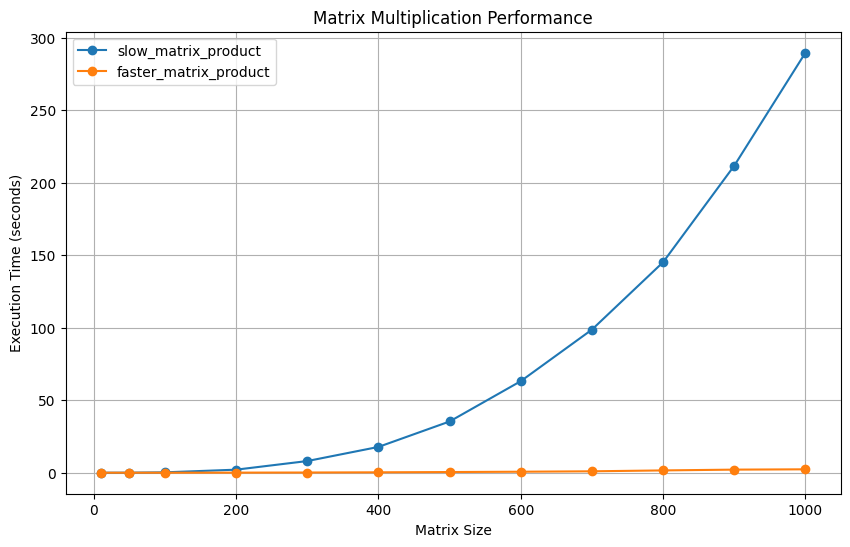

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(matrix_sizes, slow_times, label='slow_matrix_product', marker='o')
plt.plot(matrix_sizes, faster_times, label='faster_matrix_product', marker='o')
plt.xlabel('Matrix Size')
plt.ylabel('Execution Time (seconds)')
plt.legend()
plt.title('Matrix Multiplication Performance')
plt.grid(True)
plt.show()

By display the faster_matrix_product only, to see what is the exact result for large matrix

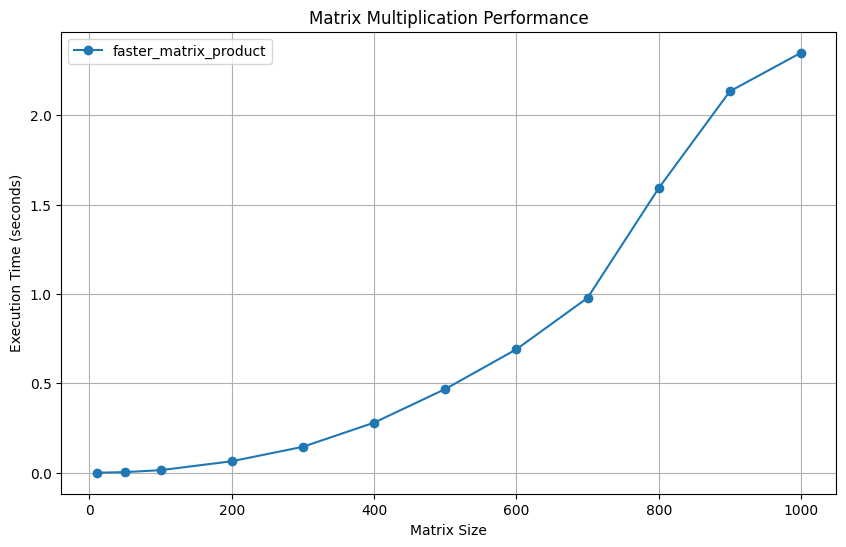

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(matrix_sizes, faster_times, label='faster_matrix_product', marker='o')
plt.xlabel('Matrix Size')
plt.ylabel('Execution Time (seconds)')
plt.legend()
plt.title('Matrix Multiplication Performance')
plt.grid(True)
plt.show()

## Summary for part1

From the results of plot, we can find that with the increase of matrix size, the execution time of the slow function increases exponentially. Although the faster function also increases, the change is very small compare to the slow function when the matrix is large.

# Part 2: speeding it up with Numba

## Fast function by using numba

using JIT to compile "faster_matrix_product" function

In [22]:
import numpy as np
import numba


@numba.jit(nopython=True)
def jit_faster_matrix_product(mat1, mat2):
    assert mat1.shape[1] == mat2.shape[0]
    result = np.empty((mat1.shape[0], mat2.shape[1]))
    for r in range(mat1.shape[0]):
        for c in range(mat2.shape[1]):
            result[r, c] = np.dot(mat1[r, :], mat2[:, c])
    return result


## Compare function 'JIT_fast', 'fast' and Numpy

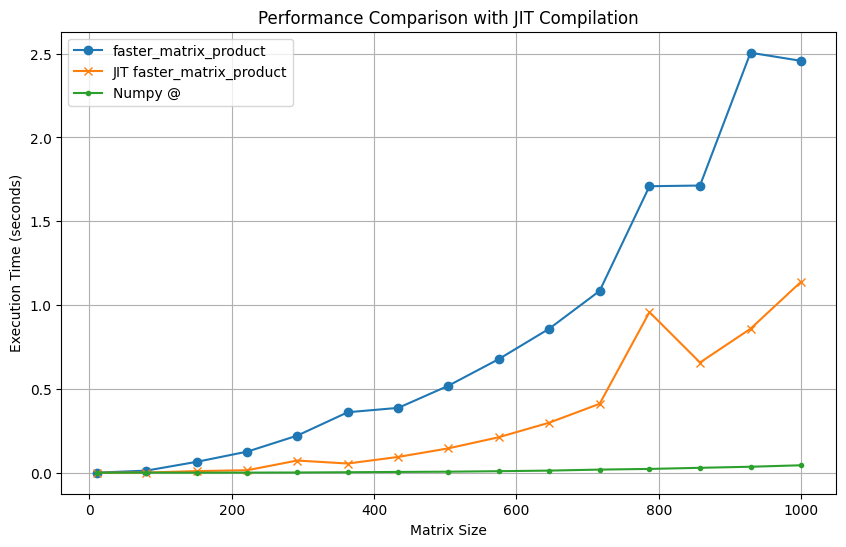

In [25]:
import time
import matplotlib.pyplot as plt


matrix_sizes = np.linspace(10, 1000, 15, dtype=int)
times_original = []
times_jit = []
times_numpy = []

for size in matrix_sizes:
    mat1 = np.random.rand(size, size)
    mat2 = np.random.rand(size, size)

    start = time.time()
    _ = faster_matrix_product(mat1, mat2)
    times_original.append(time.time() - start)

    start = time.time()
    _ = jit_faster_matrix_product(mat1, mat2)
    times_jit.append(time.time() - start)

    start = time.time()
    _ = mat1 @ mat2
    times_numpy.append(time.time() - start)

plt.figure(figsize=(10, 6))
plt.plot(matrix_sizes, times_original, label='faster_matrix_product', marker='o')
plt.plot(matrix_sizes, times_jit, label='JIT faster_matrix_product', marker='x')
plt.plot(matrix_sizes, times_numpy, label='Numpy @', marker='.')
plt.xlabel('Matrix Size')
plt.ylabel('Execution Time (seconds)')
plt.title('Performance Comparison with JIT Compilation')
plt.legend()
plt.grid(True)
plt.show()


## Summary for Numba:

From the result we can see that the function which is using numba to acclerate is faster than "fast_matrix_function" but it still cann't be so effecient like numpy.

## Further speed up

In this part we combined C-style and Fortan-style by different order on the two matrix which is being compute. and compare the speed for thess combination.

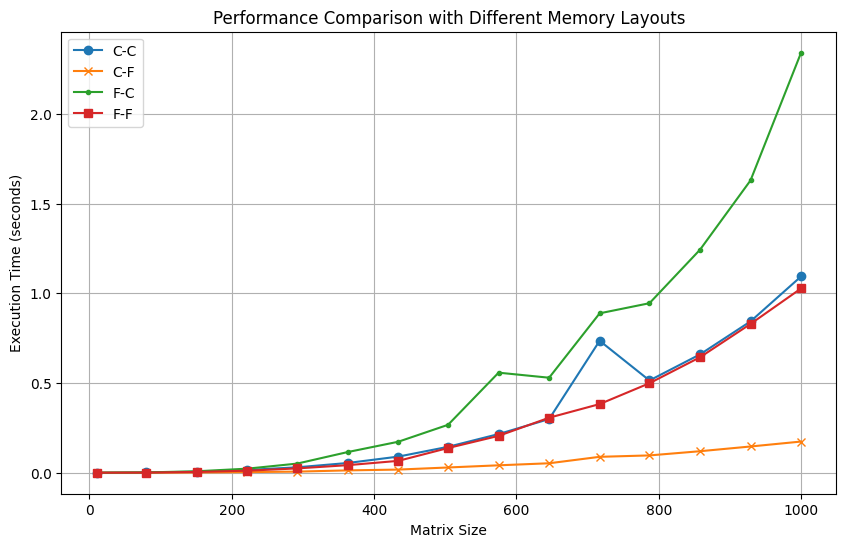

In [27]:
times_CC = []  # Both matrices in C-style ordering
times_CF = []  # First matrix in C-style and second in Fortran-style ordering
times_FC = []  # First matrix in Fortran-style and second in C-style ordering
times_FF = []  # Both matrices in Fortran-style ordering

for size in matrix_sizes:
    # init the 2 matrix by two different styles
    C_mat1 = np.random.rand(size, size)
    C_mat2 = np.random.rand(size, size)
    F_mat1 = np.asfortranarray(C_mat1)
    F_mat2 = np.asfortranarray(C_mat2)

    start = time.time()
    _ = jit_faster_matrix_product(C_mat1, C_mat2)
    times_CC.append(time.time() - start)

    start = time.time()
    _ = jit_faster_matrix_product(C_mat1, F_mat2)
    times_CF.append(time.time() - start)

    start = time.time()
    _ = jit_faster_matrix_product(F_mat1, C_mat2)
    times_FC.append(time.time() - start)

    start = time.time()
    _ = jit_faster_matrix_product(F_mat1, F_mat2)
    times_FF.append(time.time() - start)


plt.figure(figsize=(10, 6))
plt.plot(matrix_sizes, times_CC, label='C-C', marker='o')
plt.plot(matrix_sizes, times_CF, label='C-F', marker='x')
plt.plot(matrix_sizes, times_FC, label='F-C', marker='.')
plt.plot(matrix_sizes, times_FF, label='F-F', marker='s')
plt.xlabel('Matrix Size')
plt.ylabel('Execution Time (seconds)')
plt.title('Performance Comparison with Different Memory Layouts')
plt.legend()
plt.grid(True)
plt.show()


- By analysing the result from the result, we can see that the 'C-F' layout which first matrix is c-style and second is Fortran-style ordering, is the fastest performance across all the matrix size.
- The rest of combination is slower than the 'C-F', and the 'F-F'layouts after 800 there is a significant difference from the other three
- The reason for this result:
  - In my opinion, I think there are two reason result in 'C-F'is the best performance one. First is **contigous memory access**, that is because when the first matrix is in C-style ordering, accessing its rows becomes contiguous in memory. Similarly, when the second matrix uses Fortran-style ordering, accessing its columns is contiguous. This make sure that both row and column accesses benefit from contiguous memory blocks.
  - The second reason I think it may be **cache locality**, When data is accessed in contiguous blocks it improves spatial locality. And the 'C-F' combination maximizes this spatial locality benefit for both matrices.

- In contrast, that expalined the reason why 'F-F' is the poorest performance. The larger matrix sizes, results in non-contuguous memory accesses for the rows of the first matrix, which lead to  frequent cache misses and increased execution times.